## Predicting Students' Dropout and Academic Success
College dropout rates indicate that up to 32.9% of undergraduates do not complete their degree program.
First-time undergraduate first-year students have a 12-month dropout rate of 24.1%.
Among first-time bachelor’s degree seekers, 25.7% ultimately drop out; among all undergraduate students, up to 40% drop out.
Hence, Our Project aims to find the factors that contribute to student dropout and predict students' academic performance in the freshman year, to allow for early intervention and school to adminiter help (whatever help necessary e.g. academic consultation/counselling/etc) to targeted students to reduce the university dropout rate.

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Our Target Problem: Predicting Local Student Dropout Rates:

# Develop a machine learning model to predict which students are most likely to drop out based on their demographic information, academic performance, and other relevant features. 
# We identified Factors Influencing Dropouta and analyzed the dataset to identify the key factors that contribute to student dropout. 
# We tackled our Problem using 2 approaches:

# 1. We did Linear Regression using variables such as the Students' Admission Test Grade, Past Qualification Grade, age,etc. 
# In order to predict their performance in the 1st 2 semesters of school.

# 2. We did Classification using variables such as the students' gender, parent's level of education, etc
# In order to predict whether the student will drop out or not.



Below is an overview of our chosen dataset: Predict Students' Dropout and Academic Success
https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

### We did some reclassification and data cleaning of the dataset to suit our problem.

Out of all variables in the dataset, we did recategorisation of the following variables using the following clean functions:

In [ ]:
# We renamed the Students Status' to Dropouts and Non- Dropouts. Enrolled students means that they took longer than the expected duration to graduate.
def clean_Target(status):
    if status in ['Graduate', 'Enrolled']:
        return 'Non-Dropout'
    else:
        return status

# We also categorised the courses according to the broader category that they are a part of
def clean_Course(status):
    if status in [33, 9003, 9130, 9119, 9147]:
        return 'Science and Tech'
    elif status in [171, 9070]:
        return 'Arts and Design'
    elif status in [8014]:
        return 'Humanities'
    elif status in [9147, 8014, 9238, 9991, 9670, 9773]:
        return 'Business and Marketing'
    elif status in [9853]:
        return 'Education'
    elif status in [9254]:
        return 'Tourism'
    elif status in [9500, 9556, 9085]:
        return 'Healthcare'
    else:
        return 'Others'

# We also categorised the Mother's and Father's Occupation according to the industries they are under
def clean_Occupation(code):
    if code in [0]:
        return 'Student'
    elif code in [1, 2, 122, 123, 125, 131, 132, 134]:
        return 'Professional and Technical Services'
    elif code in [3, 4, 141, 143, 144]:
        return 'Administrative and Support Services'
    elif code in [5, 151, 152, 153]:
        return 'Sales and Customer Service'
    elif code in [6, 7, 171, 173, 175]:
        return 'Skilled Trades and Construction'
    elif code in [8]:
        return 'Manufacturing and Production'
    elif code in [9, 191, 192, 193, 194]:
        return 'Unskilled Labor'
    elif code in [10]:
        return 'Military'
    else:
        return 'Others'
# We also recategorised the education level of the students according to Below High School/Secondary, 
# High School/Secondary Education, Tertiary Education and Bachelors and Bachelors & above

# We categorised the level of educations from 0 to 5, where:
def clean_Education(code):
    if code in [34, 35, 36]:
        return 0 #'Uneducated'
    elif code in [37, 38]:
        return 1 #'Primary Education'
    elif code in [1, 10, 11, 12, 14, 18, 19, 26, 27, 29, 30, 39]:
        return 2 #'Secondary/High School'
    elif code in [22]:
        return 3 #'Tertiary Education'
    elif code in [2, 40]:
        return 4 #'Bachelor's'
    elif code in [3, 4, 5, 41, 42, 43, 44]:
        return 5 #'Above Bachelor's'
    else:
        return -1 #'Others'
    
def clean_previous_qualification(code):
    if code in [1, 9, 10, 12, 14, 15, 19, 38]:
        return 2 #'Secondary/High School'
    elif code in [39]:
        return 3 #'Tertiary Education'
    elif code in [2, 40]:
        return 4 #'Bachelor's'
    elif code in [3, 4, 5, 6, 42, 43]:
        return 5 #'Above Bachelor's'
    else:
        return -1 #'Others'

We also removed the following variables because we found them to be irrelevant to our problem:

In [ ]:
# Variables we removed because we think they are irrelevant to our problem:
Columns_to_remove = ['Marital status', 'Application mode', 
'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
'Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)',
'Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (without evaluations)','Unemployment rate','Inflation rate',
'GDP', 'Displaced', 'Educational special needs', 'Daytime/evening attendance	']

data.drop(Columns_to_remove, axis=1, inplace=True)

# Streamline the 'Nationality' variable to only local students (i.e. Nationality == 1)
data = data.loc[data['Nacionality'] == 1].copy()
data.drop(columns=['Nacionality', 'International'], axis=1, inplace=True)

In [ ]:
# We applied the cleaning functions to the dataset
data.loc[:, 'Target'] = data['Target'].apply(clean_Target)
data.loc[:, 'Course'] = data['Course'].apply(clean_Course)
data.loc[:, "Mother's occupation"] = data["Mother's occupation"].apply(clean_Occupation)
data.loc[:, "Father's occupation"] = data["Father's occupation"].apply(clean_Occupation)
data.loc[:, "Mother's qualification"] = data["Mother's qualification"].apply(clean_Education)
data.loc[:, "Father's qualification"] = data["Father's qualification"].apply(clean_Education)
data.loc[:, "Previous qualification"] = data["Previous qualification"].apply(clean_previous_qualification)

data = data.loc[data["Previous qualification"] != -1].copy()
data = data.loc[data["Mother's qualification"] != -1].copy()
data = data.loc[data["Father's qualification"] != -1].copy()
data = data.loc[data["Mother's occupation"] != 'Others'].copy()
data = data.loc[data["Father's occupation"] != 'Others'].copy()
data

,Application order,Course,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,5,Arts and Design,2,122.0,2,2,Sales and Customer Service,Unskilled Labor,127.3,0,1,1,0,20,0,0.000000,0,0.000000,Dropout
1,1,Tourism,2,160.0,2,5,Administrative and Support Services,Administrative and Support Services,142.5,0,0,1,0,19,6,14.000000,6,13.666667,Non-Dropout
2,5,Arts and Design,2,122.0,1,1,Unskilled Labor,Unskilled Labor,124.8,0,0,1,0,19,0,0.000000,0,0.000000,Dropout
3,2,Business and Marketing,2,122.0,1,1,Sales and Customer Service,Administrative and Support Services,119.6,0,1,0,0,20,6,13.428571,5,12.400000,Non-Dropout
4,1,Humanities,2,100.0,1,1,Unskilled Labor,Unskilled Labor,141.5,0,1,0,0,45,5,12.333333,6,13.000000,Non-Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4417,1,Arts and Design,2,132.0,2,2,Unskilled Labor,Unskilled Labor,133.8,0,1,0,1,20,6,13.833333,6,13.500000,Non-Dropout
4418,1,Arts and Design,3,120.0,5,1,Administrative and Support Services,Unskilled Labor,120.0,0,1,1,0,20,6,12.500000,7,13.142857,Non-Dropout
4419,6,Business and Marketing,2,125.0,2,2,Sales and Customer Service,Administrative and Support Services,122.2,0,1,1,0,19,5,13.600000,5,12.666667,Non-Dropout
4421,1,Healthcare,2,154.0,1,1,Unskilled Labor,Unskilled Labor,149.5,0,1,0,1,30,7,14.912500,1,13.500000,Dropout


We ended up using the following Variables, These are the Variable Descriptions: 

(Categorical) Application order: (0 - first choice to 9 - last choice)

(Categorical) Course: Regrouped into Science and Tech, Arts and Design, Humanities, Business and Marketing, Education, Tourism, Healthcare

(Categorical) Previous Qualification: 0-Uneducated;1-Primary Education;2-Secondary or High School;3-Tertiary;4-Bachelor's;5-Above Bachelor's

(Continuous Numeric) Previous Qualification(grade): Grade of previous qualification (between 0 and 200)

(Categorical) Mother's Qualification: 0-Uneducated;1-Primary Education;2-Secondary or High School;3-Tertiary;4-Bachelor's;5-Above Bachelor's

(Categorical) Father's Qualification: 0-Uneducated;1-Primary Education;2-Secondary or High School;3-Tertiary;4-Bachelor's;5-Above Bachelor's

(Categorical) Mother's Occupation: Student, Professional and Technical Services, Administrative and Support Services, Sales and Customer Service, Skilled Trades and Construction, Manufacturing and Production, Unskilled Labor, Military

(Categorical) Father's Occupation: Student, Professional and Technical Services, Administrative and Support Services, Sales and Customer Service, Skilled Trades and Construction, Manufacturing and Production, Unskilled Labor, Military

(Continuous Numeric) Admission grade: Admission grade (0 to 200)

(Binary Categorical) Debtor: 0-student does not have any loan;1-student has loans

(Binary Categorical) Tuition fees up to date: 0-student has not fully paid any outstanding tuition fees;1-student has fully paid all outstanding tuition fees

(Binary Categorical) Gender: 0-Female;1-Male

(Binary Categorical) Scholarship holder: 0-student with no scholarship;1-student with scholarship

(Discrete Numeric) Age of enrollment: Age of student at the point of enrollment

(Discrete Numeric) Curricular units 1st sem (approved): student's number of Academic Units taken in semester 1

(Continuous Numeric) Curricular units 1st sem (grade): student's average grade (0 to 20) in semester 1

(Discrete Numeric) Curricular units 2nd sem (approved): student's number of Academic Units taken in semester 2

(Continuous Numeric) Curricular units 2nd sem (grade): student's average grade (0 to 20) in semester 2

(Binary Categorical) Target: either Dropout or Non-Dropout

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4157 entries, 0 to 4422
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Application order                    4157 non-null   int64  
 1   Course                               4157 non-null   object 
 2   Previous qualification               4157 non-null   int64  
 3   Previous qualification (grade)       4157 non-null   float64
 4   Mother's qualification               4157 non-null   int64  
 5   Father's qualification               4157 non-null   int64  
 6   Mother's occupation                  4157 non-null   object 
 7   Father's occupation                  4157 non-null   object 
 8   Admission grade                      4157 non-null   float64
 9   Debtor                               4157 non-null   int64  
 10  Tuition fees up to date              4157 non-null   int64  
 11  Gender                             

In [ ]:
data.describe()

,Application order,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
count,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000
mean,1.740678,2.208804,132.550469,1.987010,1.781092,127.047799,0.107289,0.887178,0.353380,0.254992,23.140967,4.759682,10.717324,4.500842,10.339654
std,1.326096,0.671995,13.080858,1.271144,1.114779,14.270334,0.309517,0.316413,0.478077,0.435909,7.513469,3.066198,4.773118,2.997242,5.134241
min,0.000000,2.000000,95.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,124.000000,1.000000,1.000000,118.000000,0.000000,1.000000,0.000000,0.000000,19.000000,3.000000,11.000000,2.000000,10.868000
50%,1.000000,2.000000,133.100000,2.000000,2.000000,126.100000,0.000000,1.000000,0.000000,0.000000,20.000000,5.000000,12.333333,5.000000,12.250000
75%,2.000000,2.000000,140.000000,2.000000,2.000000,134.900000,0.000000,1.000000,1.000000,1.000000,25.000000,6.000000,13.400000,6.000000,13.387500
max,9.000000,5.000000,190.000000,5.000000,5.000000,190.000000,1.000000,1.000000,1.000000,1.000000,70.000000,26.000000,18.875000,20.000000,18.571429


## Exploratory Data Analysis:

We did a bar chart to show the distribution of students who dropped out vs non - dropouts.

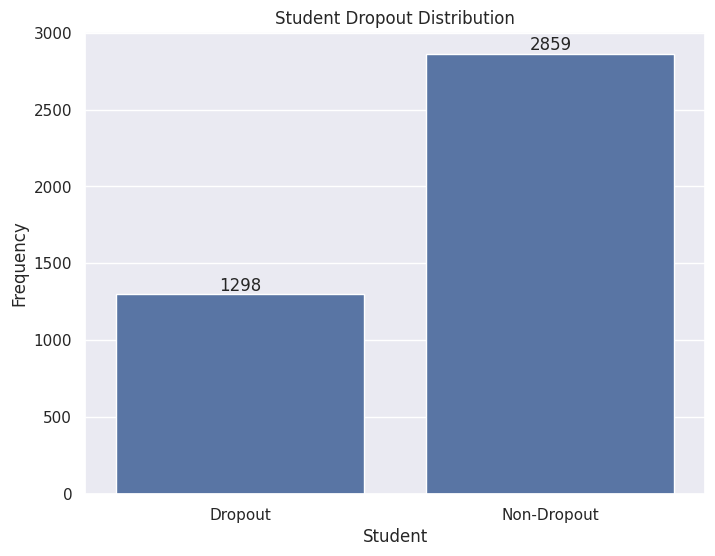

In [ ]:
## Exploratory Data Analysis:
# We plotted out the student dropout distribution
plt.figure(figsize=(8, 6))
ax = sb.countplot(x='Target', data=data)

plt.xlabel('Student')
plt.ylabel('Frequency')
plt.title('Student Dropout Distribution')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


We did a catplot to show the relationship between Mother's Occupation and Father's Occupation with Students Dropping out at school

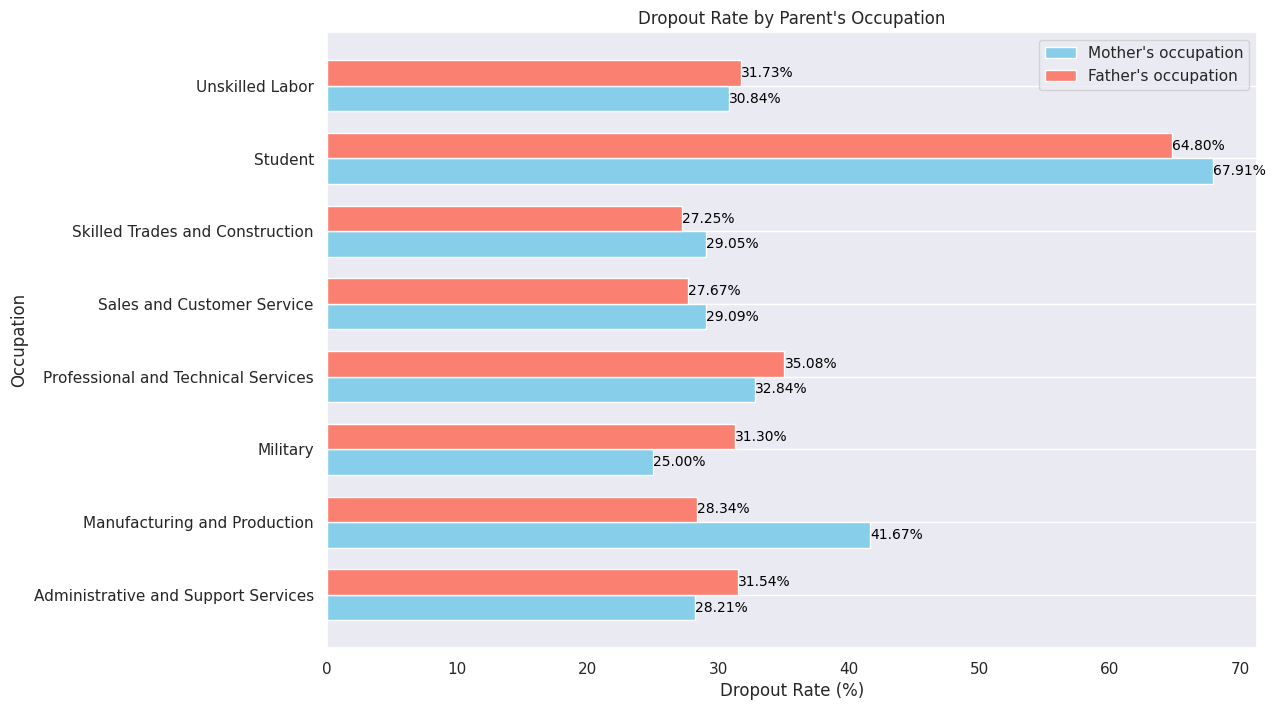

In [ ]:
# Group the data by "Mother's occupation" and calculate dropout and non-dropout counts
mother_occupation_counts = data.groupby(["Mother's occupation", 'Target']).size().unstack(fill_value=0)

# Calculate total count for each mother's occupation
mother_occupation_counts['Total'] = mother_occupation_counts.sum(axis=1)

# Calculate dropout rate (percentage) for each mother's occupation
mother_occupation_counts['Dropout Rate (%)'] = (mother_occupation_counts['Dropout'] / mother_occupation_counts['Total']) * 100

# Sort the DataFrame by dropout rate for mother's occupation
mother_occupation_counts = mother_occupation_counts.sort_values(by='Dropout Rate (%)', ascending=True)

# Group the data by "Father's occupation" and calculate dropout and non-dropout counts
father_occupation_counts = data.groupby(["Father's occupation", 'Target']).size().unstack(fill_value=0)

# Calculate total count for each father's occupation
father_occupation_counts['Total'] = father_occupation_counts.sum(axis=1)

# Calculate dropout rate (percentage) for each father's occupation
father_occupation_counts['Dropout Rate (%)'] = (father_occupation_counts['Dropout'] / father_occupation_counts['Total']) * 100

# Sort the DataFrame by dropout rate for father's occupation
father_occupation_counts = father_occupation_counts.sort_values(by='Dropout Rate (%)', ascending=True)

# Combine mother's and father's occupation counts
combined_occupation_counts = mother_occupation_counts.merge(father_occupation_counts, how='outer', left_index=True, right_index=True, suffixes=('_Mother', '_Father'))

# Plot the dropout rates for combined mother's and father's occupation
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(combined_occupation_counts))

# Plot bars for mother's occupation
bars_mother = plt.barh(index - bar_width/2, combined_occupation_counts['Dropout Rate (%)_Mother'], bar_width, label="Mother's occupation", color='skyblue')

# Plot bars for father's occupation
bars_father = plt.barh(index + bar_width/2, combined_occupation_counts['Dropout Rate (%)_Father'], bar_width, label="Father's occupation", color='salmon')

plt.xlabel('Dropout Rate (%)')
plt.ylabel('Occupation')
plt.title("Dropout Rate by Parent's Occupation")
plt.yticks(index, combined_occupation_counts.index)
plt.legend()
plt.grid(axis='x')

# Add percentage labels to each bar for mother's occupation
for bar_mother in bars_mother:
    plt.text(bar_mother.get_width(), bar_mother.get_y() + bar_mother.get_height() / 2, f'{bar_mother.get_width():.2f}%', 
             ha='left', va='center', color='black', fontsize=10)

# Add percentage labels to each bar for father's occupation
for bar_father in bars_father:
    plt.text(bar_father.get_width(), bar_father.get_y() + bar_father.get_height() / 2, f'{bar_father.get_width():.2f}%', 
             ha='left', va='center', color='black', fontsize=10)

plt.show()


We found that Students are most likely to drop out when their parents are still students 
which is quite intuitive but interesting to note.

We did another cat plot to show the relationship between their course and the student drop out rate.

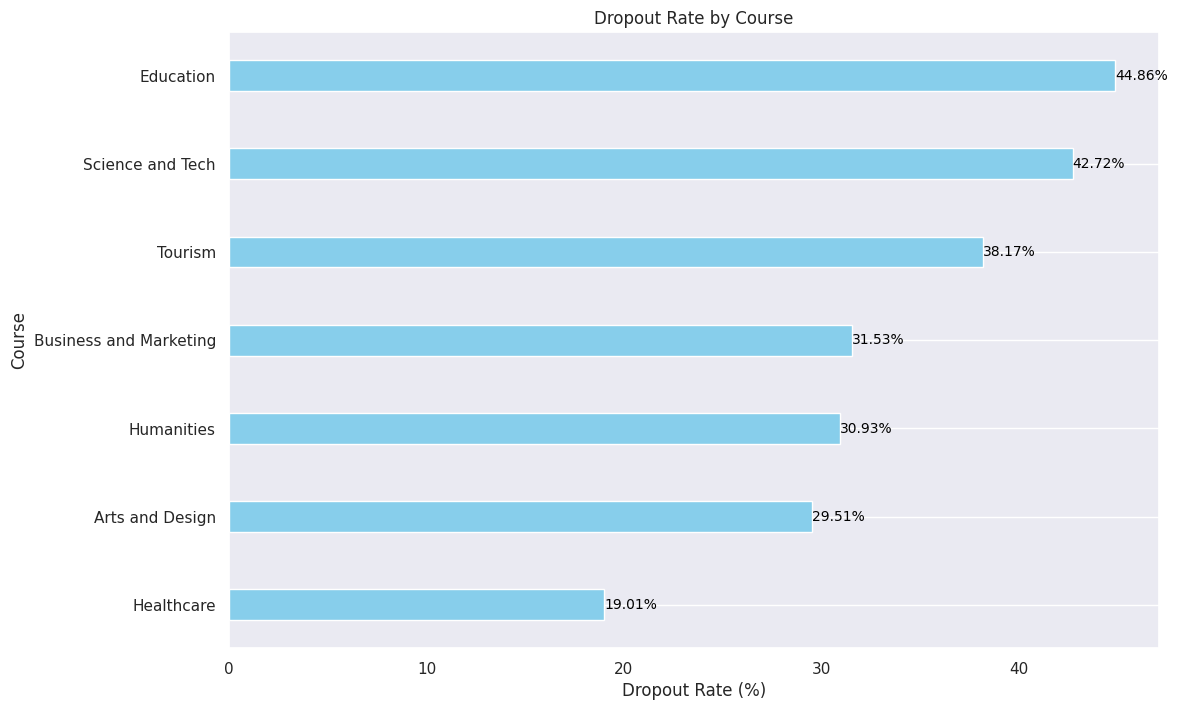

In [ ]:
# Group the data by 'Course' and calculate dropout and non-dropout counts
course_counts = data.groupby(['Course', 'Target']).size().unstack(fill_value=0)

# Calculate total count for each course
course_counts['Total'] = course_counts.sum(axis=1)

# Calculate dropout rate (percentage) for each course
course_counts['Dropout Rate (%)'] = (course_counts['Dropout'] / course_counts['Total']) * 100

# Sort the DataFrame by dropout rate for courses
course_counts = course_counts.sort_values(by='Dropout Rate (%)', ascending=True)

# Plot the dropout rates for courses
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(course_counts))

# Plot bars for courses
bars = plt.barh(index, course_counts['Dropout Rate (%)'], bar_width, color='skyblue')

plt.xlabel('Dropout Rate (%)')
plt.ylabel('Course')
plt.title("Dropout Rate by Course")
plt.yticks(index, course_counts.index)
plt.grid(axis='x')

# Add percentage labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%', 
             ha='left', va='center', color='black', fontsize=10)
            


Education has the highest dropout rate and Healthcare has a lower dropout rate.
Interesting to note, is it because of the different levels of commitment? 

Another catplot to demonstrate the relationship between students' student fees financial situation and dropout rate.

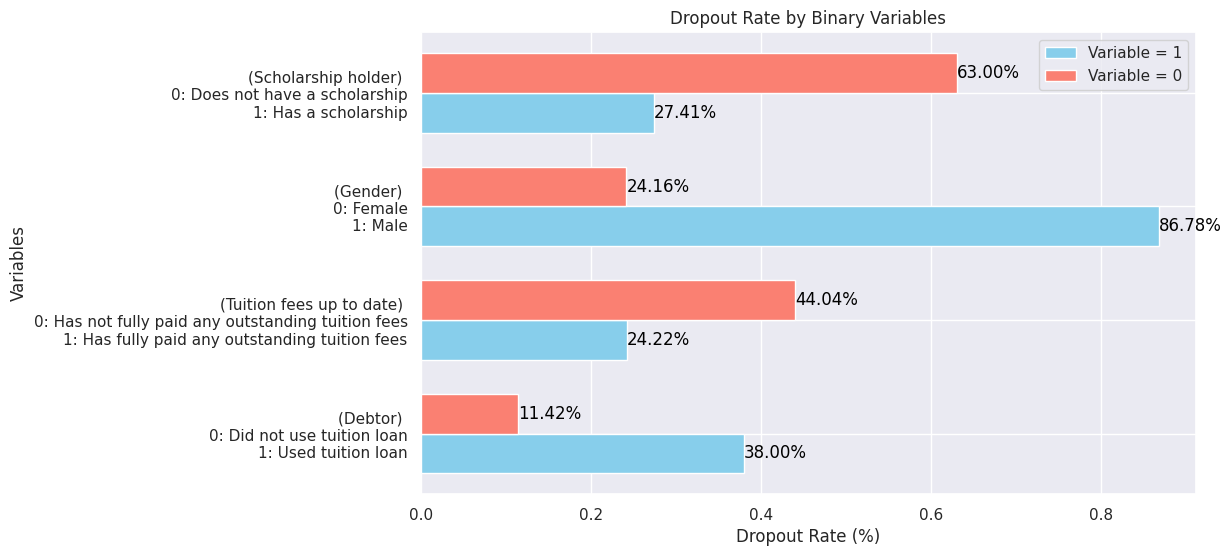

In [ ]:
import matplotlib.pyplot as plt

# List of columns to analyze
columns_to_analyze = ['Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder']

# Descriptions for each variable
variable_descriptions = {
    'Debtor': '\n0: Did not use tuition loan\n1: Used tuition loan',
    'Tuition fees up to date': '\n0: Has not fully paid any outstanding tuition fees\n1: Has fully paid any outstanding tuition fees',
    'Gender': '\n0: Female\n1: Male',
    'Scholarship holder': '\n0: Does not have a scholarship\n1: Has a scholarship'
}

# Initialize lists to store dropout rates for variables == 0 and variables == 1
dropout_rates_0 = []
dropout_rates_1 = []
variables = []

# Loop through each column and calculate the dropout rates
for column in reversed(columns_to_analyze):  # Reverse the order of columns
    # Calculate the dropout rate for when the specific column is equal to 0
    dropout_rate_0 = (data[data[column] == 0]['Target'] == 'Dropout').mean()
    dropout_rates_0.append(dropout_rate_0)
    
    # Calculate the dropout rate for when the specific column is equal to 1
    dropout_rate_1 = (data[data[column] == 1]['Target'] == 'Dropout').mean()
    dropout_rates_1.append(dropout_rate_1)
    
    # Append the variable name to the list
    variables.append(column)

# Plot the horizontal bar graph
bar_width = 0.35
index = range(len(variables))

plt.figure(figsize=(10, 6))

# Plot bars for variables == 0
plt.barh(index, dropout_rates_0, bar_width, color='skyblue', label='Variable = 1')

# Plot bars for variables == 1
plt.barh([i + bar_width for i in index], dropout_rates_1, bar_width, color='salmon', label='Variable = 0')

# Add labels and legend
plt.xlabel('Dropout Rate (%)')
plt.ylabel('Variables')
plt.title('Dropout Rate by Binary Variables')

# Modify y-axis labels to include variable name and description
plt.yticks([i + bar_width / 2 for i in index], [f'({var}) {variable_descriptions[var]}' for var in reversed(variables)])  # Reverse the order of variables
plt.legend()

# Add percentage labels to each bar
for i in index:
    plt.text(dropout_rates_0[i], i, f'{dropout_rates_0[i]*100:.2f}%', ha='left', va='center', color='black')
    plt.text(dropout_rates_1[i], i + bar_width, f'{dropout_rates_1[i]*100:.2f}%', ha='left', va='center', color='black')

plt.show()


Those with scholarships are less likely to dropout than those without.
Men are more liklely to drop out than women. 
But strange thing is those with a tuition loan dropped out more compared to those without the learn. (Probably because those without tuition loan have more disposable income that they can afforsd to pay tuition fees without a loan)

### Correlation Analysis:

We then did a correlation matrix for all the continous variables

In [ ]:
# Selecting only specific continuous variables for the correlation matrix
data_continuous = data[["Previous qualification (grade)", "Admission grade", "Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)", "Curricular units 2nd sem (approved)", "Curricular units 1st sem (approved)", "Age at enrollment"]]
# Generating the correlation matrix for continuous variables
data_continuous.corr()

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Curricular units 2nd sem (approved),Curricular units 1st sem (approved),Age at enrollment
Previous qualification (grade),1.000000,0.578380,0.055822,0.050445,0.049037,0.047287,-0.114255
Admission grade,0.578380,1.000000,0.069916,0.067917,0.069917,0.065253,-0.009473
Curricular units 1st sem (grade),0.055822,0.069916,1.000000,0.838759,0.672565,0.694415,-0.142737
Curricular units 2nd sem (grade),0.050445,0.067917,0.838759,1.000000,0.756957,0.680753,-0.155767
Curricular units 2nd sem (approved),0.049037,0.069917,0.672565,0.756957,1.000000,0.903628,-0.095377
Curricular units 1st sem (approved),0.047287,0.065253,0.694415,0.680753,0.903628,1.000000,-0.036965
Age at enrollment,-0.114255,-0.009473,-0.142737,-0.155767,-0.095377,-0.036965,1.000000


Below shows pairs of continuous variables with strong relationships with each other with a correlation greater than 0.5.

In [ ]:
# Filter the correlation matrix to find pairs with correlation greater than 0.5
correlation_matrix = data_continuous.corr()
high_corr = correlation_matrix[correlation_matrix > 0.5].stack().reset_index()
high_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_corr = high_corr[high_corr['Variable 1'] != high_corr['Variable 2']].sort_values(by='Correlation', ascending=False).drop_duplicates(subset=['Correlation'])
high_corr

,Variable 1,Variable 2,Correlation
15,Curricular units 2nd sem (approved),Curricular units 1st sem (approved),0.903628
5,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),0.838759
10,Curricular units 2nd sem (grade),Curricular units 2nd sem (approved),0.756957
7,Curricular units 1st sem (grade),Curricular units 1st sem (approved),0.694415
11,Curricular units 2nd sem (grade),Curricular units 1st sem (approved),0.680753
6,Curricular units 1st sem (grade),Curricular units 2nd sem (approved),0.672565
1,Previous qualification (grade),Admission grade,0.578380


Below is the correlation matrix and heatmap between all the continuous variables.

/tmp/ipykernel_34/1518638842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables['Target'] = selected_variables['Target'].map({'Non-Dropout': 0, 'Dropout': 1})


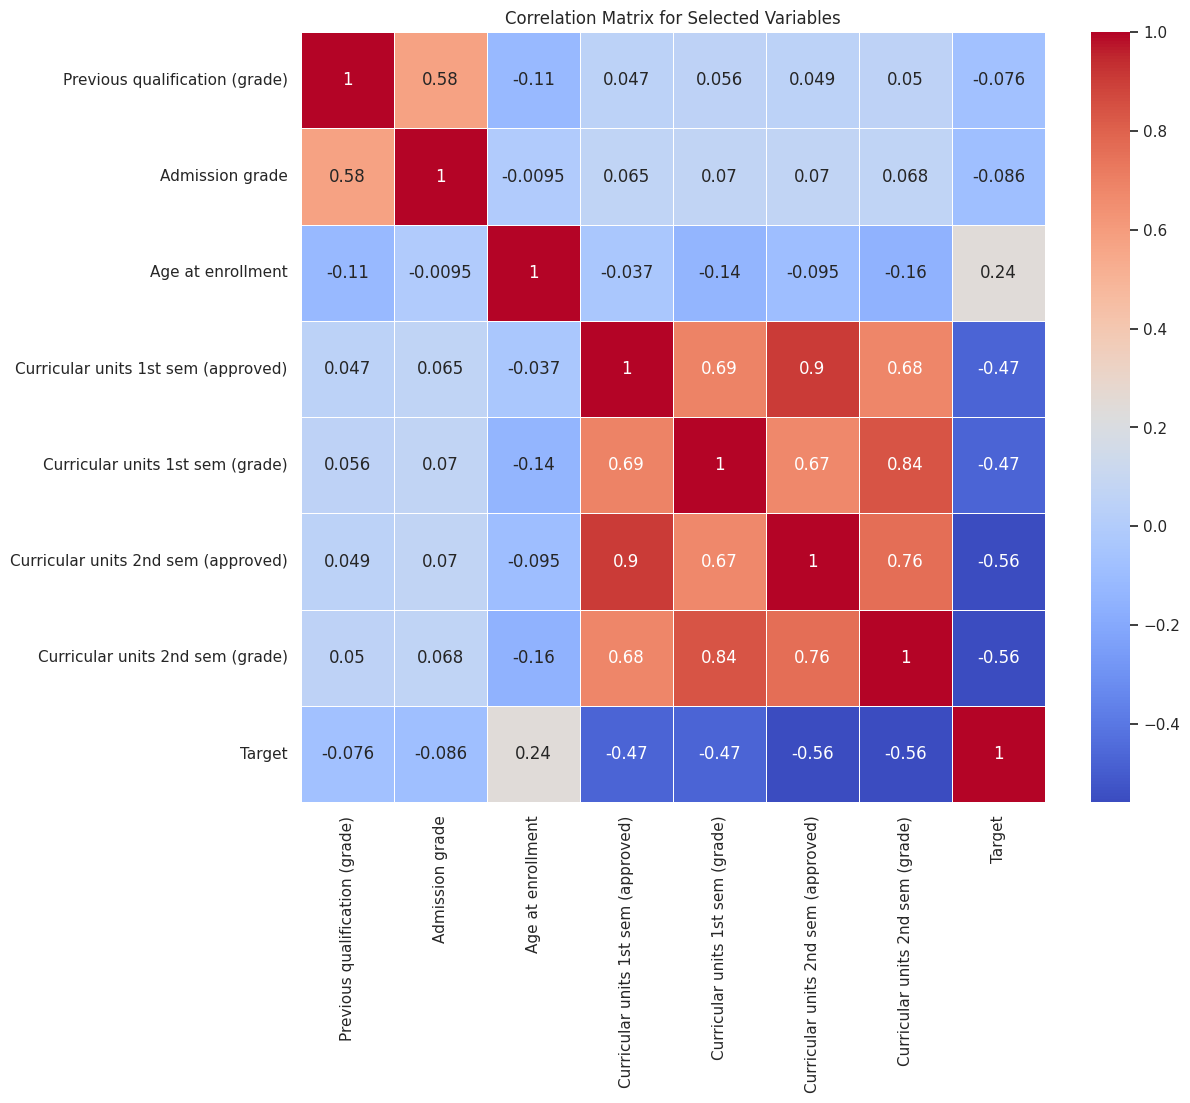

In [ ]:
# Changing 'Non-Dropout' to 1 and 'Dropout' to 0 for the correlation matrix
selected_variables = data[["Previous qualification (grade)","Admission grade", "Age at enrollment", "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)", "Curricular units 2nd sem (approved)", "Curricular units 2nd sem (grade)", "Target"]]
selected_variables['Target'] = selected_variables['Target'].map({'Non-Dropout': 0, 'Dropout': 1})

correlation_matrix_selected = selected_variables.corr()

plt.figure(figsize=(12, 10))
heatmap_selected = sb.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Selected Variables')
plt.show()

Here is a heatmap to reflect the correlation matrix, 

We found that the curricular units 1st&2nd sem grade and approved had the highest correlation with each other.

We then did a histogram, boxplot and violin plot to show the distribution of all the predictor variables.

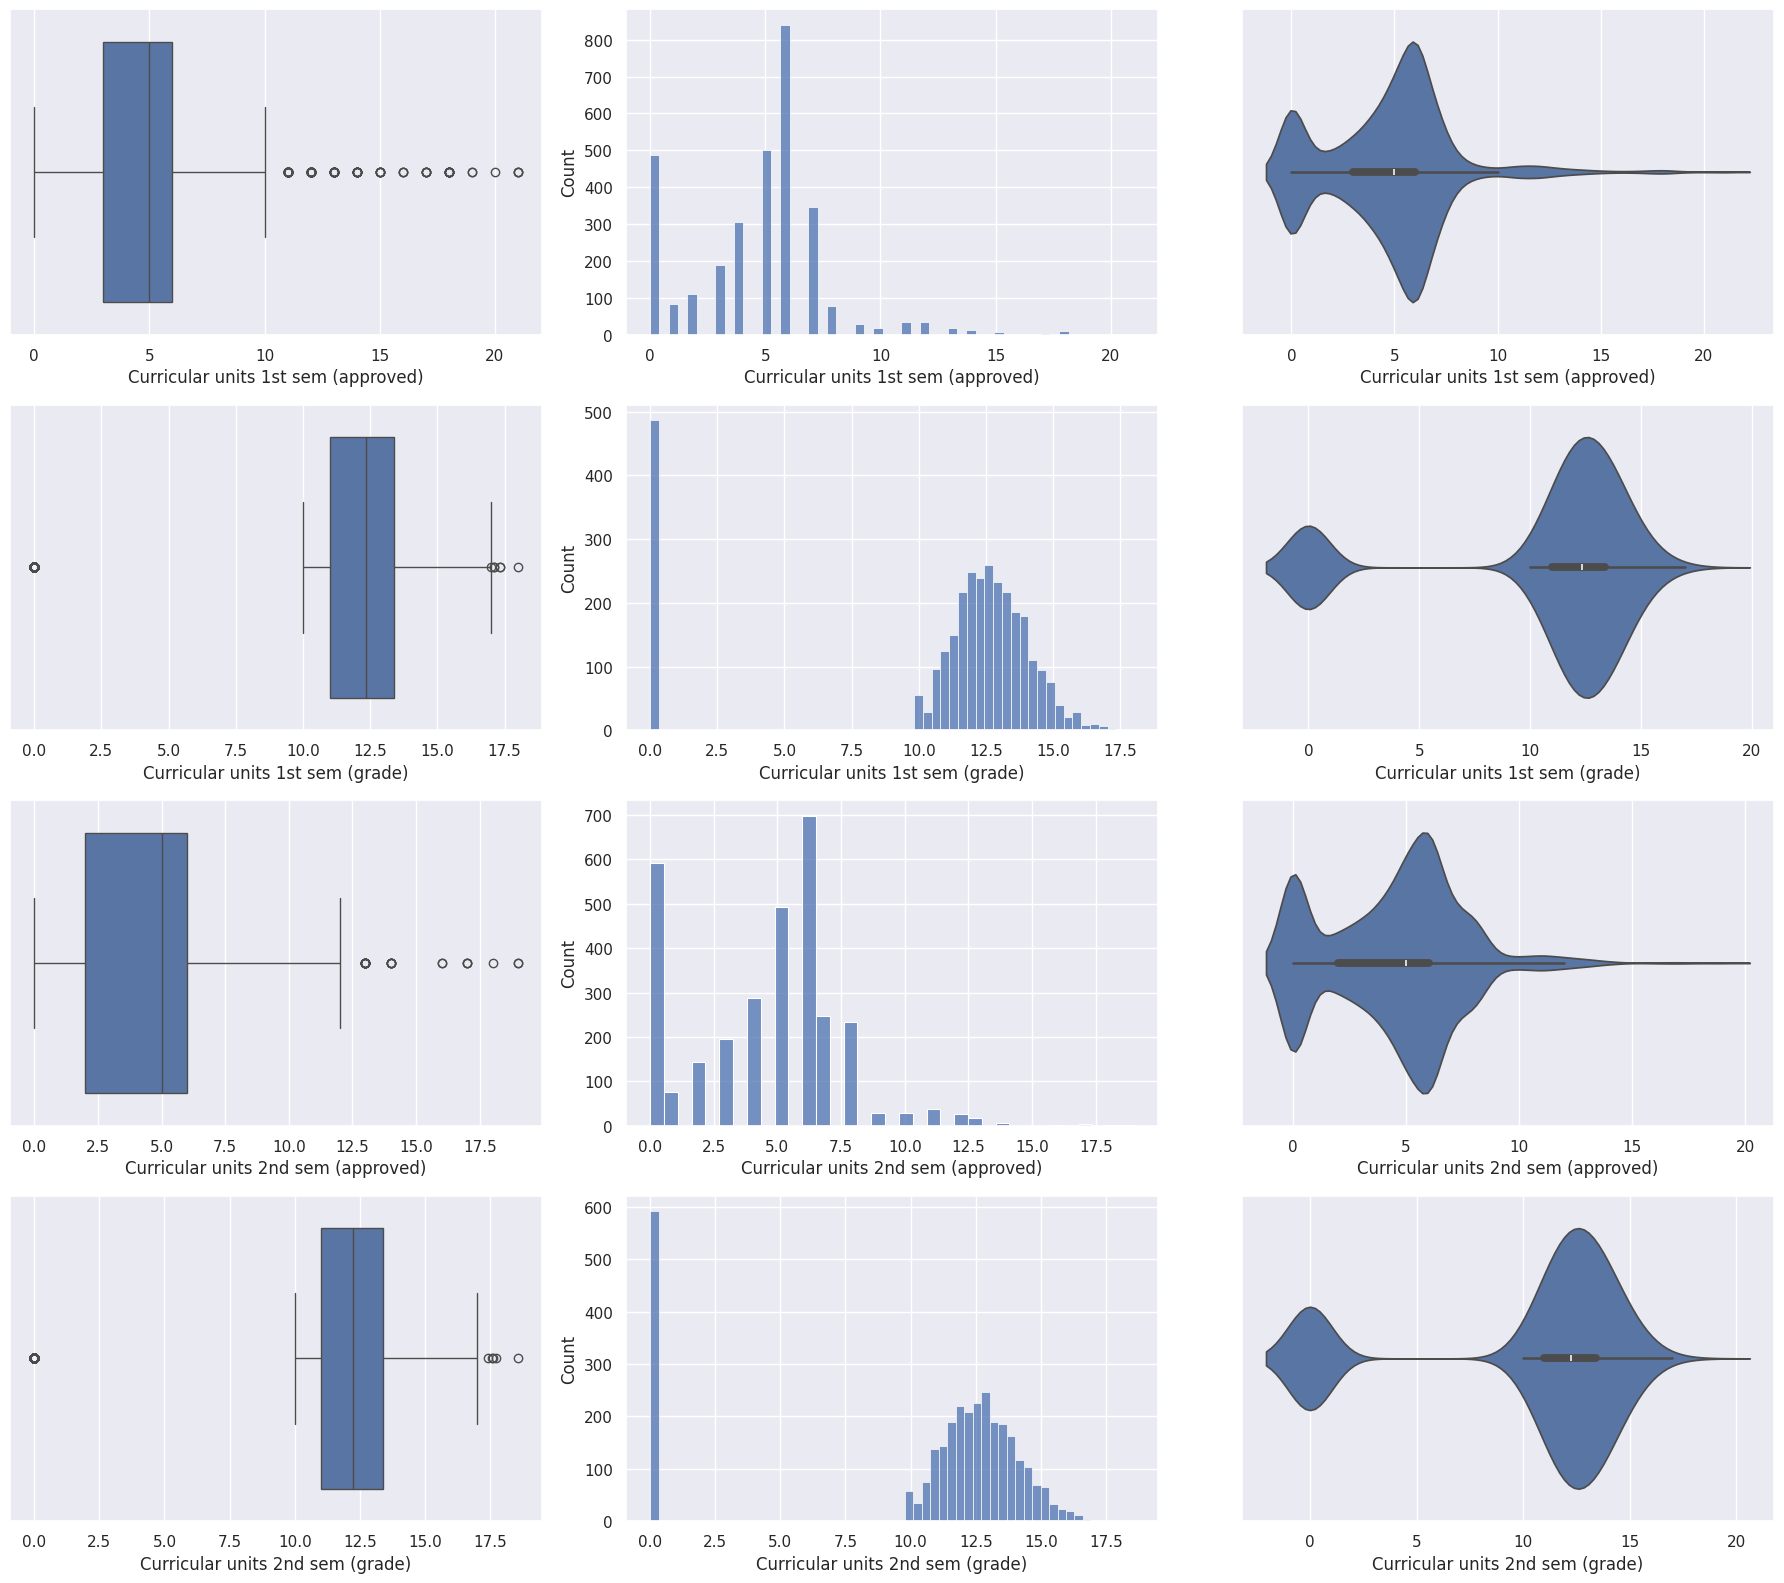

In [ ]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(4, 3, figsize=(18, 16))

columns_to_plot = ['Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
                   'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']

count = 0
for var in columns_to_plot:
    sb.boxplot(data=X_train[var], orient="h", ax=axes[count, 0])
    sb.histplot(data=X_train[var], ax=axes[count, 1])
    sb.violinplot(data=X_train[var], orient="h", ax=axes[count, 2])
    count += 1

plt.tight_layout()
plt.show()


## Machine Learning

### Linear Regression
To predict the performance of Students in School
We will be using Linear Regression to predict the grades of the students in the 1st 2 semesters at school.

#### The Response Variables will be the Curricular units 1st sem (grade) and Curricular units 2nd sem (grade)
#### The Predictor Variables will be the variables that have floating point values:
Previous qualification, Age at enrollment, Admission grade, Previous qualification (grade)

#### We will be using MSE as a metric for our regression models.
Model Evaluation: MSE is frequently used to evaluate the performance of regression models during training and testing phases. It provides a quantitative measure of how well the model's predictions align with the actual values in the dataset.
Model Comparison: MSE can be used to compare the performance of different regression models. Lower MSE values indicate better model performance, as they reflect smaller prediction errors on average.
Optimization: MSE is often used as the loss function to optimize when training regression models. During model training, the goal is to minimize the MSE by adjusting the model parameters to improve the fit between the predicted and actual values.

In [ ]:
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Extract Response and Predictors
y = data[["Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)"]]
X = data[["Previous qualification", "Age at enrollment", "Admission grade", "Previous qualification (grade)"]]

# Split the Dataset for the uncleaned data 80:20
# Set at random state 42 for uniformity for subsequent regression models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

# Removing outliers
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X_clean = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
y_clean = y.loc[X_clean.index]

# Remove all actual scores equal to 0 (as observed from the unclean data, it is obvious that they are outliers to be removed)
y_clean = y_clean[(y_clean["Curricular units 1st sem (grade)"] != 0) & (y_clean["Curricular units 2nd sem (grade)"] != 0)]
X_clean = X_clean.loc[y_clean.index]

# Split the Dataset into Train and Test for cleaned data in similar fashion to the uncleaned data
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size = 0.20, random_state=42)

# Linear Regression using Train Data for both cleaned and uncleaned data
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_clean = LinearRegression()
linreg_clean.fit(X_train_clean, y_train_clean)

# Predict Response corresponding to Predictors for both cleaned and uncleaned data
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)
y_train_pred_clean = linreg_clean.predict(X_train_clean)
y_test_pred_clean = linreg_clean.predict(X_test_clean)

# Figures for Unclean data
fig_train = go.Figure()
fig_train.add_trace(go.Scatter(x=y_train.iloc[:, 0], y=y_train_pred[:, 0], mode='markers', name='Actual vs. Predicted (Train)'))
fig_train.add_trace(go.Scatter(x=y_train.iloc[:, 0], y=np.poly1d(np.polyfit(y_train.iloc[:, 0], y_train_pred[:, 0], 1))(y_train.iloc[:, 0]), mode='lines', name='Regression Line (Train)'))
fig_train.update_layout(title='Unclean Data: Actual vs Predicted Train Data', xaxis_title='Actual', yaxis_title='Predicted')

fig_test = go.Figure()
fig_test.add_trace(go.Scatter(x=y_test.iloc[:, 0], y=y_test_pred[:, 0], mode='markers', name='Actual vs. Predicted (Test)'))
fig_test.add_trace(go.Scatter(x=y_test.iloc[:, 0], y=np.poly1d(np.polyfit(y_test.iloc[:, 0], y_test_pred[:, 0], 1))(y_test.iloc[:, 0]), mode='lines', name='Regression Line (Test)'))
fig_test.update_layout(title='Unclean Data: Actual vs Predicted Test Data', xaxis_title='Actual', yaxis_title='Predicted')

# Plot figures for Clean data
fig_clean_train = go.Figure()
fig_clean_train.add_trace(go.Scatter(x=y_train_clean.iloc[:, 0], y=y_train_pred_clean[:, 0], mode='markers', name='Actual vs. Predicted (Train)'))
fig_clean_train.add_trace(go.Scatter(x=y_train_clean.iloc[:, 0], y=np.poly1d(np.polyfit(y_train_clean.iloc[:, 0], y_train_pred_clean[:, 0], 1))(y_train_clean.iloc[:, 0]), mode='lines', name='Regression Line (Train)'))
fig_clean_train.update_layout(title='Clean Data: Actual vs Predicted Train Data', xaxis_title='Actual', yaxis_title='Predicted')

fig_clean_test = go.Figure()
fig_clean_test.add_trace(go.Scatter(x=y_test_clean.iloc[:, 0], y=y_test_pred_clean[:, 0], mode='markers', name='Actual vs. Predicted (Test)'))
fig_clean_test.add_trace(go.Scatter(x=y_test_clean.iloc[:, 0], y=np.poly1d(np.polyfit(y_test_clean.iloc[:, 0], y_test_pred_clean[:, 0], 1))(y_test_clean.iloc[:, 0]), mode='lines', name='Regression Line (Test)'))
fig_clean_test.update_layout(title='Clean Data: Actual vs Predicted Test Data', xaxis_title='Actual', yaxis_title='Predicted')


# Display plots
fig_train.show()
fig_test.show()
fig_clean_train.show()
fig_clean_test.show()

# Goodness of Fit (on Train and Test Data) for clean and unclean data
print("\nUncleaned Data - Goodness of Fit of Model \tTrain Dataset: Mean Squared Error (MSE):", mean_squared_error(y_train, y_train_pred))
print("                                            \tTest Dataset: Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Cleaned Data - Goodness of Fit of Model \tTrain Dataset: Mean Squared Error (MSE):", mean_squared_error(y_train_clean, y_train_pred_clean))
print("                                        \tTest Dataset: Mean Squared Error (MSE):", mean_squared_error(y_test_clean, y_test_pred_clean))

# K-Fold Cross Validation manually implemented
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
mse_scores_clean = []

for train_index, test_index in kf.split(X):
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    linreg.fit(X_train_kf, y_train_kf)
    y_pred_kf = linreg.predict(X_test_kf)
    mse = mean_squared_error(y_test_kf, y_pred_kf)
    mse_scores.append(mse)

average_mse = np.mean(mse_scores)
print("\nK-Fold Cross Validation Results (Mean Squared Error) for Unclean Data:")
print(mse_scores)
print("Average MSE for Unclean Data:", average_mse)

for train_index, test_index in kf.split(X_clean):
    X_train_kfclean, X_test_kfclean = X_clean.iloc[train_index], X_clean.iloc[test_index]
    y_train_kfclean, y_test_kfclean = y_clean.iloc[train_index], y_clean.iloc[test_index]
    linreg_clean.fit(X_train_kfclean, y_train_kfclean)
    y_pred_kfclean = linreg_clean.predict(X_test_kfclean)
    mse_clean = mean_squared_error(y_test_kfclean, y_pred_kfclean)
    mse_scores_clean.append(mse_clean)

average_mse_clean = np.mean(mse_scores_clean)
print("\nK-Fold Cross Validation Results (Mean Squared Error) for Clean Data:")
print(mse_scores_clean)
print("Average MSE for Clean Data:", average_mse_clean)


Uncleaned Data - Goodness of Fit of Model 	Train Dataset: Mean Squared Error (MSE): 24.676453989998876
                                            	Test Dataset: Mean Squared Error (MSE): 20.82492485735599
Cleaned Data - Goodness of Fit of Model 	Train Dataset: Mean Squared Error (MSE): 1.5749131508732113
                                        	Test Dataset: Mean Squared Error (MSE): 1.5239824919407252

K-Fold Cross Validation Results (Mean Squared Error) for Unclean Data:
[20.82492485735601, 25.765914318074305, 24.196917549203313, 25.81579486320055, 23.420681870354137]
Average MSE for Unclean Data: 24.004846691637663

K-Fold Cross Validation Results (Mean Squared Error) for Clean Data:
[1.5239824919407254, 1.5677184645136968, 1.566986598802096, 1.713982264091387, 1.4825751204479174]
Average MSE for Clean Data: 1.5710489879591645


### Random Forest Regressor
Next we will experiment using the Random Forest Regressor to see if we can get a better model.
Random Forest Regressor is a type of ensemble learning method used for regression tasks. It belongs to the family of decision tree-based algorithms and is an extension of the Random Forest algorithm, which operates by constructing a multitude of decision trees during training and outputting the class or mean prediction of the individual trees which is primarily used for classification.
Random Forest Regressor is less prone to overfitting compared to individual decision trees, especially when using a large number of trees in the ensemble. The randomness introduced during training helps to decorrelate the trees and reduce overfitting

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.model_selection import train_test_split
import plotly.express as px
import pandas as pd

# Extract Response and Predictors
y = data[["Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)"]]
X = data[["Previous qualification", "Age at enrollment", "Admission grade", "Previous qualification (grade)"]]

# Split the Dataset into Train and Test for uncleaned data
X_train_uncleaned, X_test_uncleaned, y_train_uncleaned, y_test_uncleaned = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the RandomForestRegressor
rf_regressor_uncleaned = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the RandomForestRegressor on uncleaned data
rf_regressor_uncleaned.fit(X_train_uncleaned, y_train_uncleaned)

# Predicting the Response on uncleaned data
y_train_pred_uncleaned = rf_regressor_uncleaned.predict(X_train_uncleaned)
y_test_pred_uncleaned = rf_regressor_uncleaned.predict(X_test_uncleaned)

# Print MSE and explained variance for uncleaned data model
print("Uncleaned Data - Train Datset MSE:", mean_squared_error(y_train_uncleaned, y_train_pred_uncleaned))
print("                 Test Dataset MSE:", mean_squared_error(y_test_uncleaned, y_test_pred_uncleaned))

# Remove outliers from predictors
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X_cleaned = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
y_cleaned = y.loc[X_cleaned.index]

# Remove all actual scores equal to 0 (as observed from the unclean data, it is obvious that they are outliers to be removed)
y_cleaned = y_cleaned[(y_cleaned["Curricular units 1st sem (grade)"] != 0) & (y_cleaned["Curricular units 2nd sem (grade)"] != 0)]
X_cleaned = X_cleaned.loc[y_cleaned.index]

# Split the cleaned Dataset into Train and Test
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.20, random_state=42)

# Initialize the RandomForestRegressor for cleaned data
rf_regressor_cleaned = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the RandomForestRegressor on cleaned data
rf_regressor_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Predicting the cleaned Response
y_train_pred_cleaned = rf_regressor_cleaned.predict(X_train_cleaned)
y_test_pred_cleaned = rf_regressor_cleaned.predict(X_test_cleaned)

# Print MSE and explained variance for cleaned data model
print("Cleaned Data - Train Dataset MSE:", mean_squared_error(y_train_cleaned, y_train_pred_cleaned))
print("               Test Dataset MSE:", mean_squared_error(y_test_cleaned, y_test_pred_cleaned))

# Convert the actual and predicted responses to a DataFrame for easy plotting
# Uncleaned data results
train_results_uncleaned = pd.DataFrame({'Actual': y_train_uncleaned.iloc[:, 0], 'Predicted': y_train_pred_uncleaned[:, 0]})
test_results_uncleaned = pd.DataFrame({'Actual': y_test_uncleaned.iloc[:, 0], 'Predicted': y_test_pred_uncleaned[:, 0]})
# Cleaned data results
train_results_cleaned = pd.DataFrame({'Actual': y_train_cleaned.iloc[:, 0], 'Predicted': y_train_pred_cleaned[:, 0]})
test_results_cleaned = pd.DataFrame({'Actual': y_test_cleaned.iloc[:, 0], 'Predicted': y_test_pred_cleaned[:, 0]})

# Plotting actual vs predicted values for uncleaned training data
fig_train_uncleaned = px.scatter(train_results_uncleaned, x='Actual', y='Predicted', title='Actual vs Predicted - Training Data (Uncleaned)')
fig_train_uncleaned.add_shape(type='line', line=dict(dash='dot'), x0=train_results_uncleaned['Actual'].min(), y0=train_results_uncleaned['Actual'].min(), x1=train_results_uncleaned['Actual'].max(), y1=train_results_uncleaned['Actual'].max())

# Plotting actual vs predicted values for uncleaned testing data
fig_test_uncleaned = px.scatter(test_results_uncleaned, x='Actual', y='Predicted', title='Actual vs Predicted - Testing Data (Uncleaned)')
fig_test_uncleaned.add_shape(type='line', line=dict(dash='dot'), x0=test_results_uncleaned['Actual'].min(), y0=test_results_uncleaned['Actual'].min(), x1=test_results_uncleaned['Actual'].max(), y1=test_results_uncleaned['Actual'].max())

# Plotting actual vs predicted values for cleaned training data
fig_train_cleaned = px.scatter(train_results_cleaned, x='Actual', y='Predicted', title='Actual vs Predicted - Training Data (Cleaned)')
fig_train_cleaned.add_shape(type='line', line=dict(dash='dot'), x0=train_results_cleaned['Actual'].min(), y0=train_results_cleaned['Actual'].min(), x1=train_results_cleaned['Actual'].max(), y1=train_results_cleaned['Actual'].max())

# Plotting actual vs predicted values for cleaned testing data
fig_test_cleaned = px.scatter(test_results_cleaned, x='Actual', y='Predicted', title='Actual vs Predicted - Testing Data (Cleaned)')
fig_test_cleaned.add_shape(type='line', line=dict(dash='dot'), x0=test_results_cleaned['Actual'].min(), y0=test_results_cleaned['Actual'].min(), x1=test_results_cleaned['Actual'].max(), y1=test_results_cleaned['Actual'].max())

# Show the plots
fig_train_uncleaned.show()
fig_test_uncleaned.show()
fig_train_cleaned.show()
fig_test_cleaned.show() 

# K-Fold Cross Validation manually implemented
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores_uncleaned = []
mse_scores_cleaned = []

for train_index, test_index in kf.split(X):
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    rf_regressor_uncleaned.fit(X_train_kf, y_train_kf)
    y_pred_kf_uncleaned = rf_regressor_uncleaned.predict(X_test_kf)
    mse_uncleaned = mean_squared_error(y_test_kf, y_pred_kf_uncleaned)
    mse_scores_uncleaned.append(mse_uncleaned)

average_mse_uncleaned = np.mean(mse_scores_uncleaned)
print("\nK-Fold Cross Validation Results (Mean Squared Error) for Unclean Data:")
print(mse_scores_uncleaned)
print("Average MSE for Unclean Data:", average_mse_uncleaned)

for train_index, test_index in kf.split(X_cleaned):
    X_train_kfcleaned, X_test_kfcleaned = X_cleaned.iloc[train_index], X_cleaned.iloc[test_index]
    y_train_kfcleaned, y_test_kfcleaned = y_cleaned.iloc[train_index], y_cleaned.iloc[test_index]
    rf_regressor_cleaned.fit(X_train_kfcleaned, y_train_kfcleaned)
    y_pred_kfcleaned = rf_regressor_cleaned.predict(X_test_kfcleaned)
    mse_cleaned = mean_squared_error(y_test_kfcleaned, y_pred_kfcleaned)
    mse_scores_cleaned.append(mse_cleaned)

average_mse_cleaned = np.mean(mse_scores_cleaned)
print("\nK-Fold Cross Validation Results (Mean Squared Error) for Clean Data:")
print(mse_scores_cleaned)
print("Average MSE for Clean Data:", average_mse_cleaned)

Uncleaned Data - Train Datset MSE: 5.89037076887077
                 Test Dataset MSE: 25.211466536297408
Cleaned Data - Train Dataset MSE: 0.3605508864839023
               Test Dataset MSE: 1.779372518009569



K-Fold Cross Validation Results (Mean Squared Error) for Unclean Data:
[25.429996265136275, 28.870180294557237, 27.58797367084971, 29.256671110432748, 26.63686279035287]
Average MSE for Unclean Data: 27.556336826265767

K-Fold Cross Validation Results (Mean Squared Error) for Clean Data:
[1.7826103221587695, 2.016178511756448, 1.846719882517081, 2.0414439949046903, 1.8110627139081328]
Average MSE for Clean Data: 1.8996030850490242


### Gradient Boosting
We will experiment using Gradient Boosting on RandomForestRegressor.
Gradient Boosting is a machine learning technique used for both regression and classification problems. It works by building a series of weak learners (usually decision trees) sequentially, with each new learner correcting the errors made by the previous ones. The key idea behind Gradient Boosting is to fit a sequence of models to the data, where each new model focuses on the examples that were poorly predicted by the previous models
Gradient boosting typically produces highly accurate predictions compared to other machine learning algorithms. It builds a sequence of weak learners, each correcting the errors of its predecessor, leading to strong predictive models. Through techniques like shrinkage (learning rate) and tree pruning, gradient boosting can effectively control overfitting. Regularization methods, such as tree depth restriction and feature subsampling, further enhance model robustness.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.model_selection import train_test_split
import plotly.express as px
import pandas as pd

# Extract Response and Predictors
y = data["Curricular units 1st sem (grade)"]  # Use only one target variable
X = data[["Previous qualification", "Age at enrollment", "Admission grade", "Previous qualification (grade)"]]

# Remove outliers from predictors
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X_cleaned = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
y_cleaned = y.loc[X_cleaned.index]

# Remove all actual scores equal to 0 (as observed from the unclean data, it is obvious that they are outliers to be removed)
y_cleaned = y_cleaned[y_cleaned != 0]
X_cleaned = X_cleaned.loc[y_cleaned.index]

# Split the cleaned Dataset into Train and Test
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.20, random_state=42)

# Initialize the GradientBoostingRegressor for cleaned data
gb_regressor_cleaned = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the GradientBoostingRegressor on cleaned data
gb_regressor_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Predicting the cleaned Response
y_train_pred_cleaned = gb_regressor_cleaned.predict(X_train_cleaned)
y_test_pred_cleaned = gb_regressor_cleaned.predict(X_test_cleaned)

# Print MSE and explained variance for cleaned data model
print("Cleaned Data - Train Dataset MSE:", mean_squared_error(y_train_cleaned, y_train_pred_cleaned))
print("               Test Dataset MSE:", mean_squared_error(y_test_cleaned, y_test_pred_cleaned))

# Convert the actual and predicted responses to a DataFrame for easy plotting
# Cleaned data results
train_results_cleaned = pd.DataFrame({'Actual': y_train_cleaned, 'Predicted': y_train_pred_cleaned})
test_results_cleaned = pd.DataFrame({'Actual': y_test_cleaned, 'Predicted': y_test_pred_cleaned})

# Plotting actual vs predicted values for cleaned training data
fig_train_cleaned = px.scatter(train_results_cleaned, x='Actual', y='Predicted', title='Actual vs Predicted - Training Data (Cleaned)')
fig_train_cleaned.add_shape(type='line', line=dict(dash='dot'), x0=train_results_cleaned['Actual'].min(), y0=train_results_cleaned['Actual'].min(), x1=train_results_cleaned['Actual'].max(), y1=train_results_cleaned['Actual'].max())

# Plotting actual vs predicted values for cleaned testing data
fig_test_cleaned = px.scatter(test_results_cleaned, x='Actual', y='Predicted', title='Actual vs Predicted - Testing Data (Cleaned)')
fig_test_cleaned.add_shape(type='line', line=dict(dash='dot'), x0=test_results_cleaned['Actual'].min(), y0=test_results_cleaned['Actual'].min(), x1=test_results_cleaned['Actual'].max(), y1=test_results_cleaned['Actual'].max())

# Show the plots
fig_train_cleaned.show()
fig_test_cleaned.show()

# K-Fold Cross Validation manually implemented
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores_uncleaned = []
mse_scores_cleaned = []
for train_index, test_index in kf.split(X_cleaned):
    X_train_kfcleaned, X_test_kfcleaned = X_cleaned.iloc[train_index], X_cleaned.iloc[test_index]
    y_train_kfcleaned, y_test_kfcleaned = y_cleaned.iloc[train_index], y_cleaned.iloc[test_index]
    rf_regressor_cleaned.fit(X_train_kfcleaned, y_train_kfcleaned)
    y_pred_kfcleaned = rf_regressor_cleaned.predict(X_test_kfcleaned)
    mse_cleaned = mean_squared_error(y_test_kfcleaned, y_pred_kfcleaned)
    mse_scores_cleaned.append(mse_cleaned)

average_mse_cleaned = np.mean(mse_scores_cleaned)
print("\nK-Fold Cross Validation Results (Mean Squared Error) for Clean Data:")
print(mse_scores_cleaned)
print("Average MSE for Clean Data:", average_mse_cleaned)

Cleaned Data - Train Dataset MSE: 1.302622113801773
               Test Dataset MSE: 1.6304265179387463



K-Fold Cross Validation Results (Mean Squared Error) for Clean Data:
[1.9993656230569608, 1.8219626668983968, 1.910754196300287, 1.9175342171191632, 1.9027751924319085]
Average MSE for Clean Data: 1.910478379161343


### Choice of Best Model : Basic Linear Regression Model
After experimenting with a few different Models, we found the basic Linear Regression Model to be the most accurate with the lowest MSE for both test and train (on average), even though RandomForestRegressor and Gradient Boosting performed much better for the test datasets, with (0.36) and (1.30) MSE values respectively. The Basic Linear Regression Model outperfomed both in the test dataset. I subsequently performed K-fold Cross Validation manually on all the models, and the Basic Linear Regression Model was the best performer with the lowest average MSE of 1.5710489879591645 for clean data.

I believe this is because of the following:
Linear Relationships: If the relationship between the features and the target variable is approximately linear, a linear regression model may provide a better fit than tree-based models like Random Forest Regression and Gradient Boosting.
Avoidance of Overfitting: Linear regression models are less prone to overfitting compared to more complex models like Random Forest Regression and Gradient Boosting. If there is limited training data or a risk of overfitting, a simpler linear regression model might generalize better.
Low-Dimensional Data: In scenarios with a small number of features and a relatively simple data structure, a linear regression model might be sufficient to capture the underlying patterns in the data. Tree-based models may be prone to overfitting in such cases.
### Conclusion :
The Linear Regression Model will help us to predict the combined grade of Students' first and second semesters. The Model is quite accuate with a relatively low MSE of around 1.57. Using this information, we can help teachers to identify students who would potentially do poorer in the first year of university and allow for early intervention to prevent students from dropping out. 
However, the model is limited in flexibility as Linear regression assumes a linear relationship between the independent and dependent variables. It may not capture complex non-linear relationships present in the data, leading to poor predictive performance when the relationship is non-linear.
And as you can see from graphs, there may be anomalies that are outside of the prediction range.

### Classification Tree Model
We also created a model using Classification Tree to predict whether a student will likely to drop-out or not based on their backgrounds and academic performance. We made 2 different models: 

**Model 1:** We use the their current academic performance in university as predictors (i.e. their average grades and curricular units taken in semester 1 and 2), which has been shown through the correlation matrix to have the highest correlation values with our response variable (whether a student will dropout or not).

**Model 2:** We also use several categorical variables that describe their background before entering university, such as their parent's education level, their university applications, and their pre-university academic performace, to predict the same response variable.

### Procedures
We first divided the data into the **Train Set (80%)** and **the Test Set (20%)**.

We created 2 different models of depth 3 using Decision Tree Classifier, and plotted the corresponding **classification tree** and **confusion matrix** for the Train Set and Test Set.

We ran through different max depths and found that max depth 3 yields the best results.

We used **Clasification Accuracy** and **F1 Score** as metrics to evaluate the performance of the classification model, and **compared it between the 2 models** to determine which variables are more accurate in predicting whether a student will drop out or not. 

However, we think that **F1 Score** might be a more accurate metric in our case, as the number of Non-Dropouts in our dataset is double that of Dropouts, indicating an imbalanced dataset that may result in a higher than actual value of Classification Accuracy when a model predicts the majority class for all instances.

In [ ]:
y = pd.DataFrame(data['Target'])
x = pd.DataFrame(data[['Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)']])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test with a specific random state
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (3325, 1) (3325, 4)
Test Set  : (832, 1) (832, 4)


Text(0.5, 1.0, 'Test Set (Max Depth 3)')

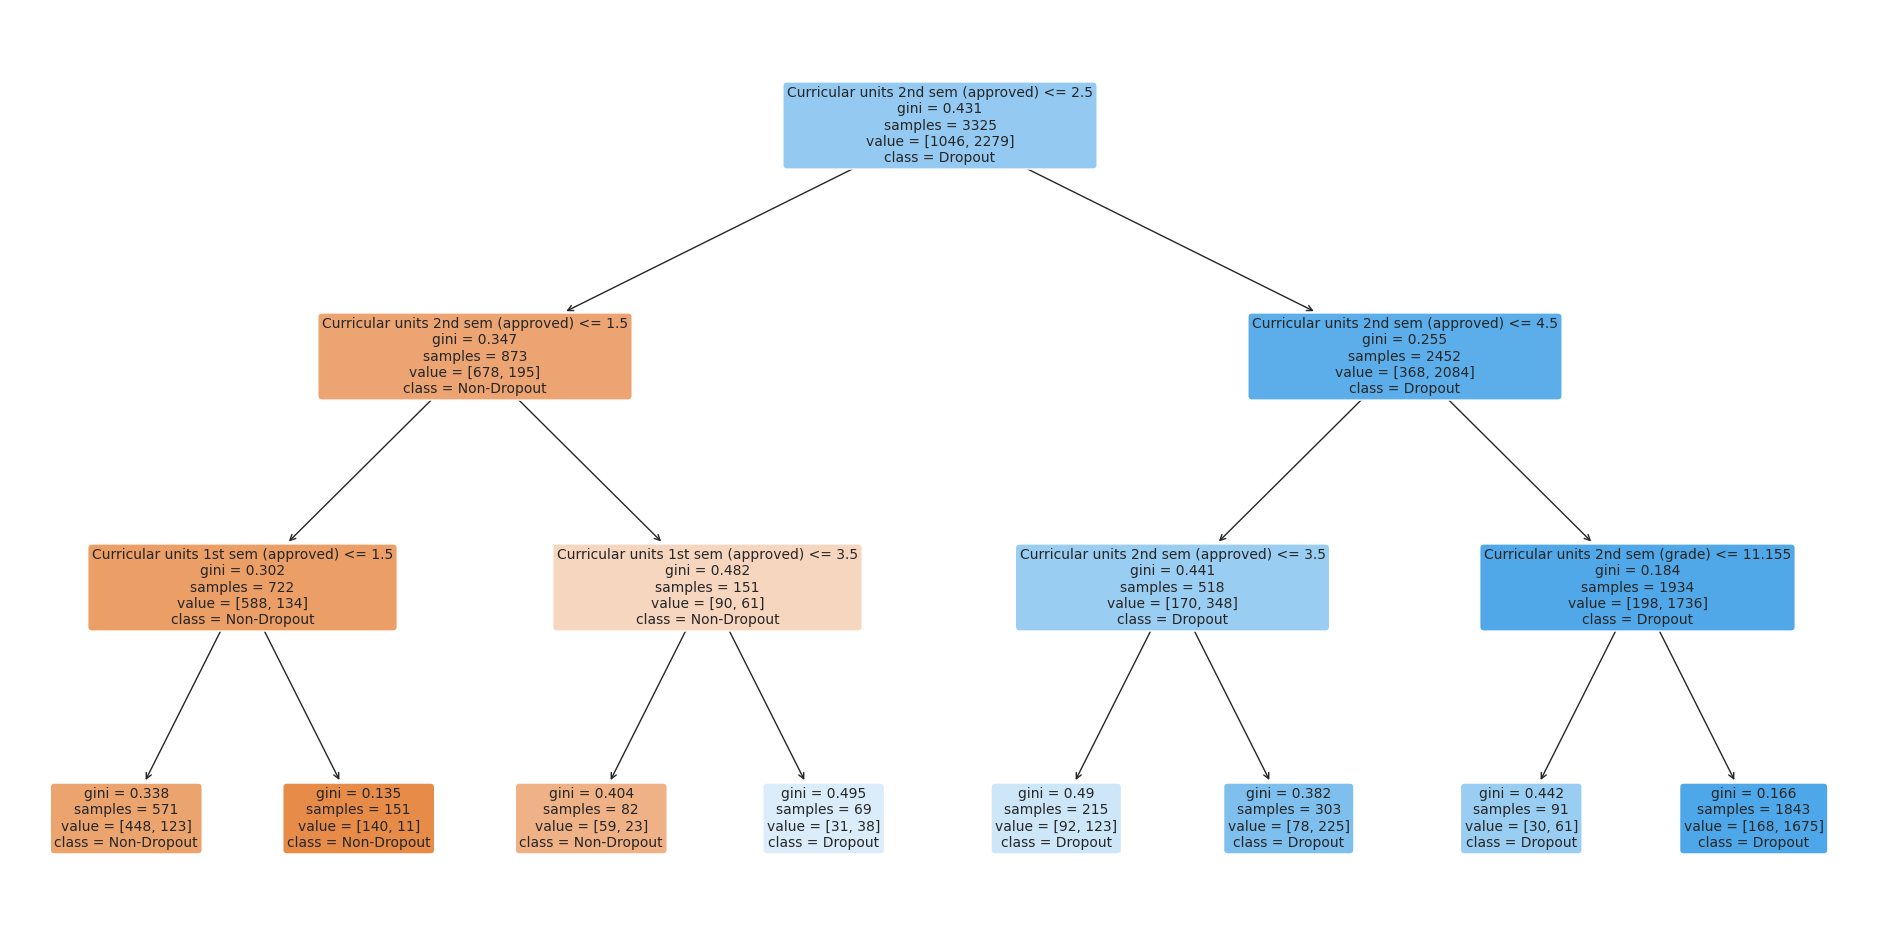

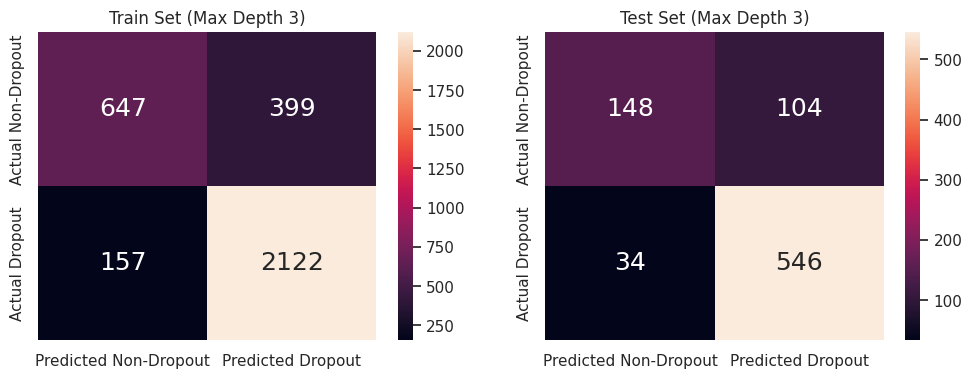

In [ ]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,12))  # Adjusted for better readability
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Non-Dropout","Dropout"],
          fontsize=10)  # Added fontsize for better readability

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0],
           xticklabels = ["Predicted Non-Dropout", "Predicted Dropout"], yticklabels = ["Actual Non-Dropout", "Actual Dropout"])
axes[0].set_title('Train Set (Max Depth 3)')           
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1],
           xticklabels = ["Predicted Non-Dropout", "Predicted Dropout"], yticklabels = ["Actual Non-Dropout", "Actual Dropout"])
axes[1].set_title('Test Set (Max Depth 3)')           

In [ ]:
from sklearn.metrics import f1_score

f1_score_train = f1_score(y_train, y_train_pred, pos_label='Dropout')  # assuming 'Dropout' is the positive class
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("F1 Score                \t:", f1_score_train)

f1_score_test = f1_score(y_test, y_test_pred, pos_label='Dropout')  # assuming 'Dropout' is the positive class
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("F1 Score                \t:", f1_score_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8327819548872181
F1 Score                	: 0.6994594594594594
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8341346153846154
F1 Score                	: 0.6820276497695853


In [ ]:
y = pd.DataFrame(data['Target'])
x = pd.DataFrame(data[['Application order','Previous qualification','Previous qualification (grade)',"Mother's qualification","Father's qualification", 'Admission grade']])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (3325, 1) (3325, 6)
Test Set  : (832, 1) (832, 6)


Text(0.5, 1.0, 'Test Set (Max Depth 3)')

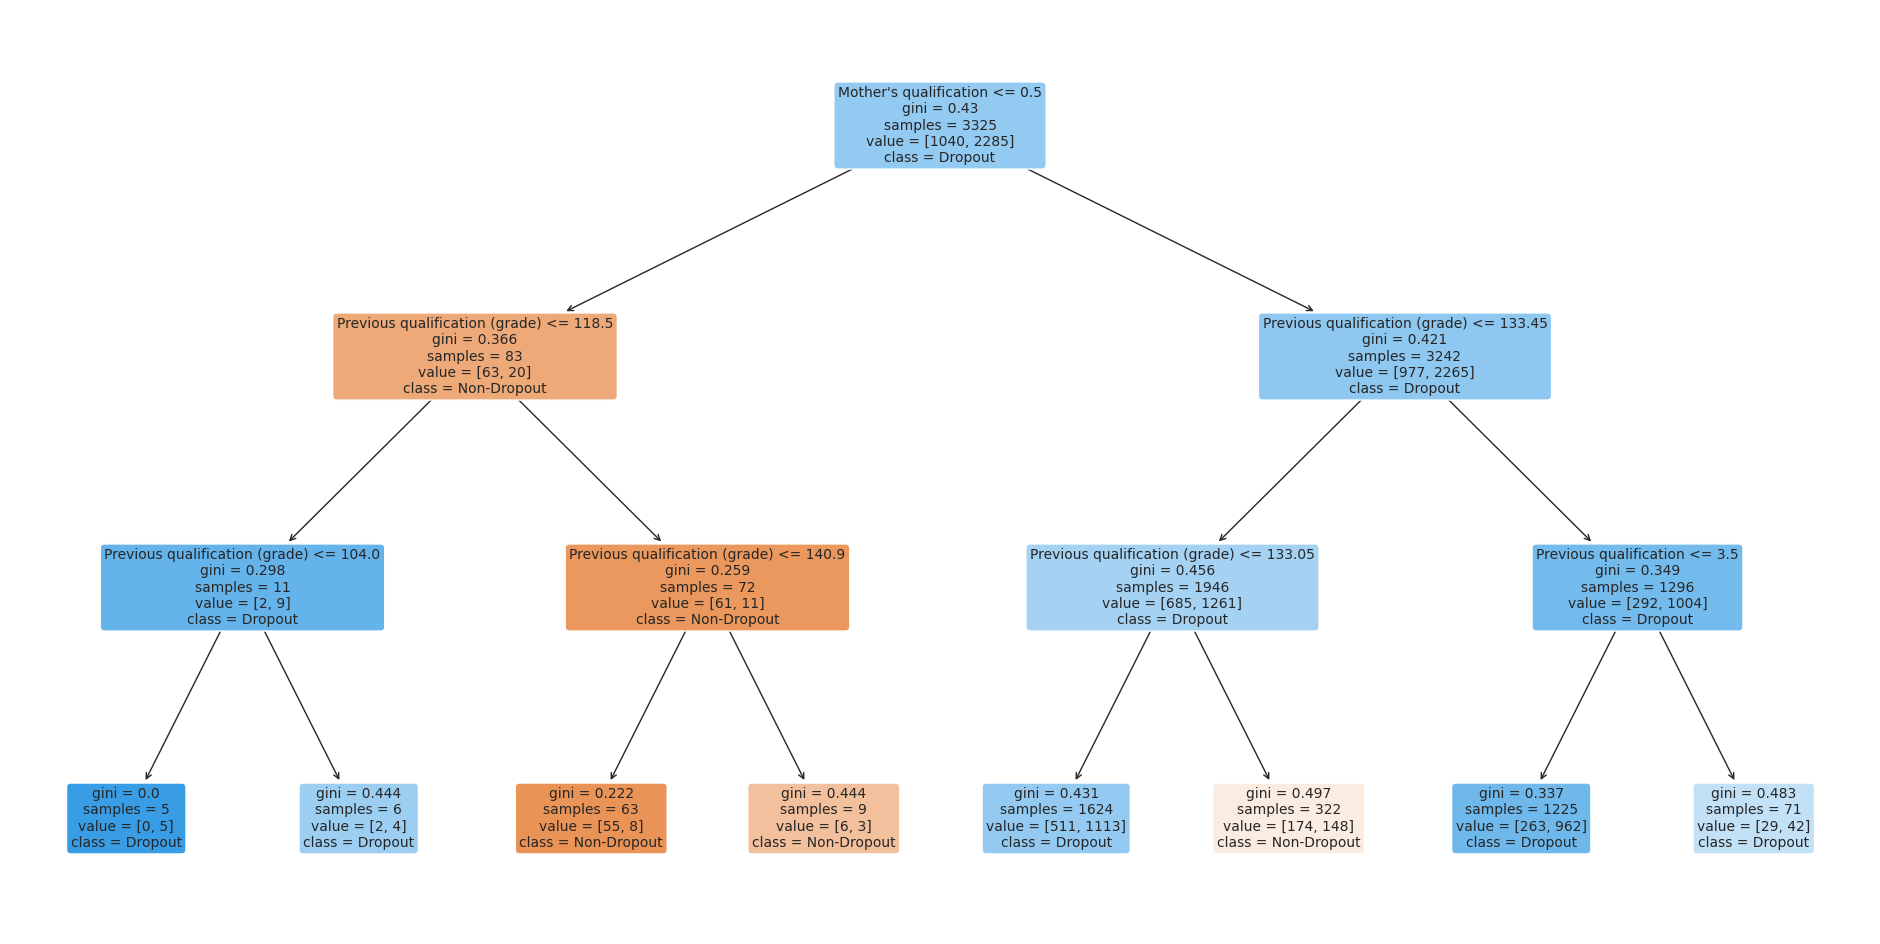

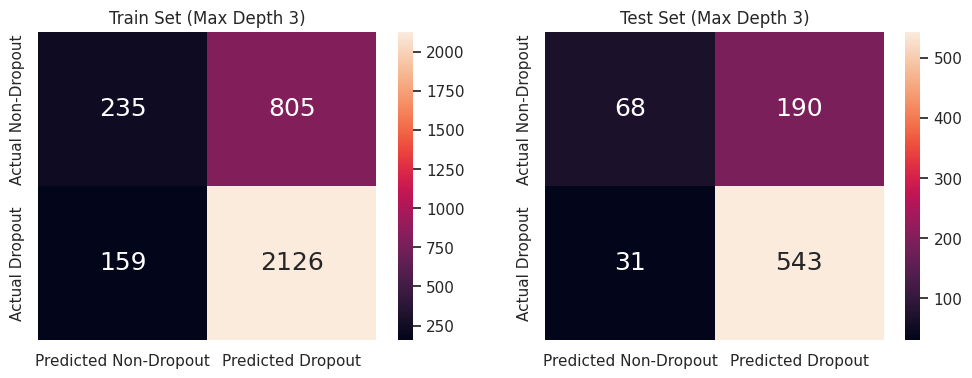

In [ ]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,12))  # Adjusted for better readability
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Non-Dropout","Dropout"],
          fontsize=10)  # Added fontsize for better readability

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0],
           xticklabels = ["Predicted Non-Dropout", "Predicted Dropout"], yticklabels = ["Actual Non-Dropout", "Actual Dropout"])
axes[0].set_title('Train Set (Max Depth 3)')           
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1],
           xticklabels = ["Predicted Non-Dropout", "Predicted Dropout"], yticklabels = ["Actual Non-Dropout", "Actual Dropout"])
axes[1].set_title('Test Set (Max Depth 3)')    

In [ ]:
from sklearn.metrics import f1_score

f1_score_train = f1_score(y_train, y_train_pred, pos_label='Dropout')  # assuming 'Dropout' is the positive class
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("F1 Score                \t:", f1_score_train)

f1_score_test = f1_score(y_test, y_test_pred, pos_label='Dropout')  # assuming 'Dropout' is the positive class
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("F1 Score                \t:", f1_score_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7100751879699249
F1 Score                	: 0.3277545327754533
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.734375
F1 Score                	: 0.380952380952381


#### Insights for Classfication Tree Model
**MODEL 1: USING CURRENT ACADEMIC PERFORMANCE IN UNIVERSITY AS PREDICTORS**

Model 1 has a **high Classification Accuracy** for both the Train Set (0.833) and Test Set (0.834), and a **moderately high F1 Score** for both the Train Set (0.699) and Test Set (0.682). Thus, Model 1 seems to fair equally in the Test Set. 

From the Classification Tree, it is clear that the **number of curricular units** students take plays a more important role in the prediction than their grades as seen by the overwhelming number of Decision Nodes that uses the number of curricular units as the feature. More specifically, it is **the number of curricular units taken in Semester 2** that appears at the top and appears the majority of the time.

Hence, we can conclude that the "Curricular units 2nd sem (approved)" column is a very good indicator variable of whether a student is likely to drop out or not. As seen by the Classification Tree, a student who takes a relatively lower Academic Unit (AU) **(AU <= 3.5, where the median in the dataset is 5.0)** is going to be predicted as a Non-Dropout. 

As AU is a reflection of how many mods a student takes in a semester, this Classification Tree thus reveals that **the academic workload/stress from taking classes in Semester 2 that increases AU to more than 3.5 is likely to be a reason for a student to drop out.**


**MODEL 2: USING VARIABLES DESCRIBING THEIR BACKGROUND AND PRE-UNIVERSITY PERFORMANCE AS PREDICTORS**

Model 2 has a Classification Accuracy of 0.710 and 0.734 for the Train Set and Test Set respectively, and an F1 Score of 0.328 and 0.381 respectively.

The low value of F1 Score can be attributed to the **high cases of false positives**, where a student is approximately **3 times more likely to be incorrectly predicted as a Dropout** when we use pre-university information as the predictor variables. 

Hence, when we compare both models, Model 1 is objectively the more superior model in predicting the dropout likelihood of a student. This also means that a student's performance indicators in university is the better predictor variables, which is expected since whether a student will drop out or not is likely to be determined by factors resulting from their university experience, and not their past/background.

<hr>

## Conclusion
Our Project concludes with the following insights:
First, our linear regression model to predict students' grades in the first year of university was relatively successful, comparing the three models we used, achieving a low MSE of estimatedly 1.57. We could use our model to predict the academic performance of students entering their freshman year of university.
Second, our classification models using the students' backgrounds and acdemic grades separately acheiving varying results, has allowed us to conclude that using students'current academic performance in university is more effective in predicting whether a student will drop out or not as compared to their background.

Hence, using the results we have gathered from our models, we can predict a student's performance in the first year of university, which allows us to pinpoint students' who are likely to struggle in their freshmen year and
We also can use our classfication model, to identify students who are most likely to drop out. This would allow the school to administer help to them earlier, (either academic/mental/etc) so that they will do better and become less likely to drop out. Which would help reduce number of university students who drop out. Resolving our problem definition.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f16ab78f-9bff-45a5-879a-c10bc36ea382' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>